# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import  numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size': 16})

In [2]:
dataset = get_dataset("data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [45]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # Color Map for the classes
    color_map = {1:'red', 2:'blue', 4:'green'}
    
    plt.figure(figsize=(20, 10))
    
    i = 0
    for sample in batch:
        fig, ax = plt.subplots(figsize=(20, 10)) 
        for bounding_box, obj_class in zip(sample['groundtruth_boxes'].numpy(), sample['groundtruth_classes'].numpy()):
            img = sample['image'].numpy()
            x_coord = bounding_box[1] * img.shape[1]
            y_coord = bounding_box[0] * img.shape[0]
            w = (bounding_box[3] - bounding_box[1]) * img.shape[1]
            h = (bounding_box[2] - bounding_box[0]) * img.shape[0]
            rec = patches.Rectangle((x_coord, y_coord), w, h, facecolor='none', edgecolor=color_map[obj_class], linewidth=2)
            ax.imshow(img)
            ax.add_patch(rec)
        i += 1
    
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 1440x720 with 0 Axes>

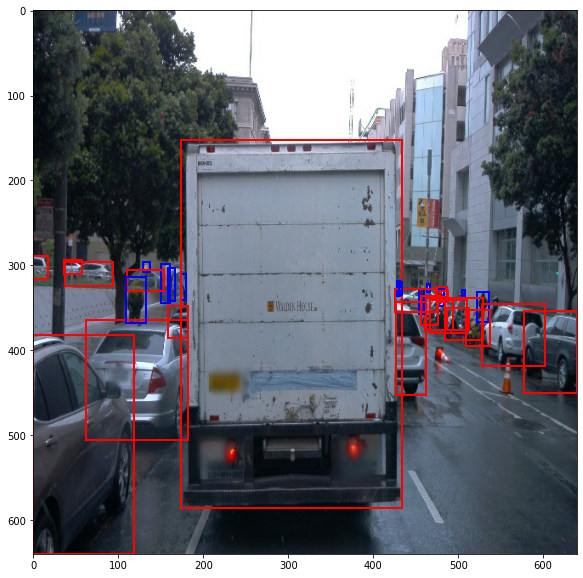

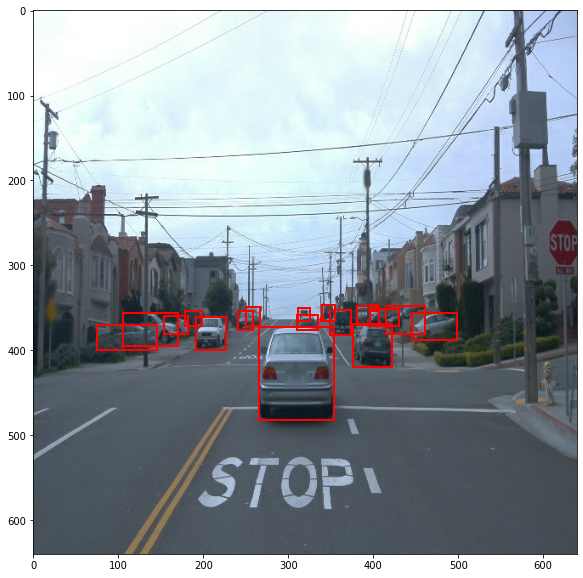

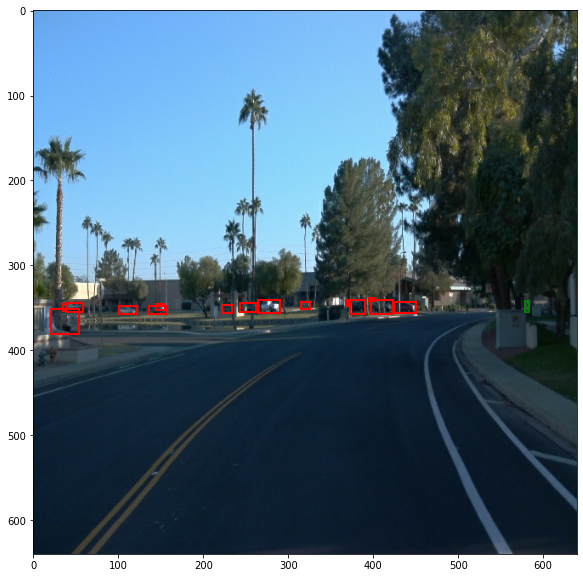

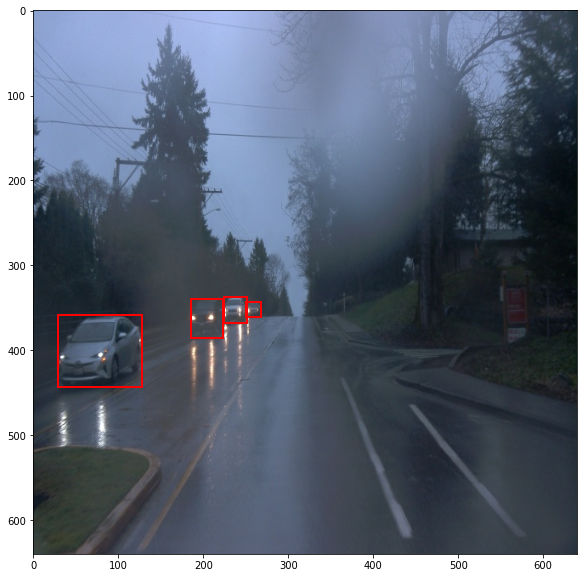

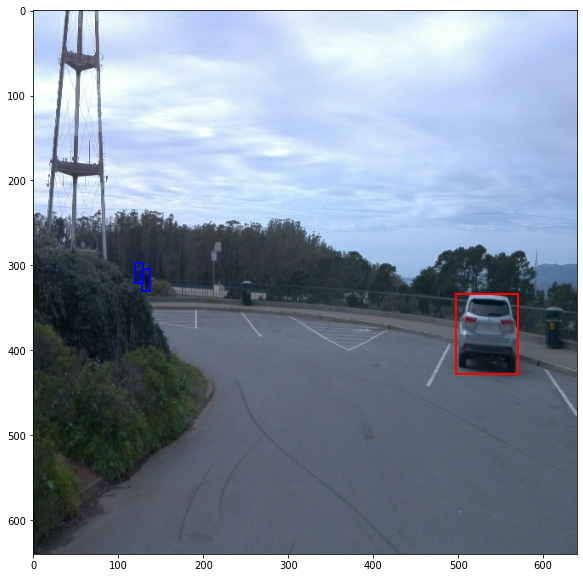

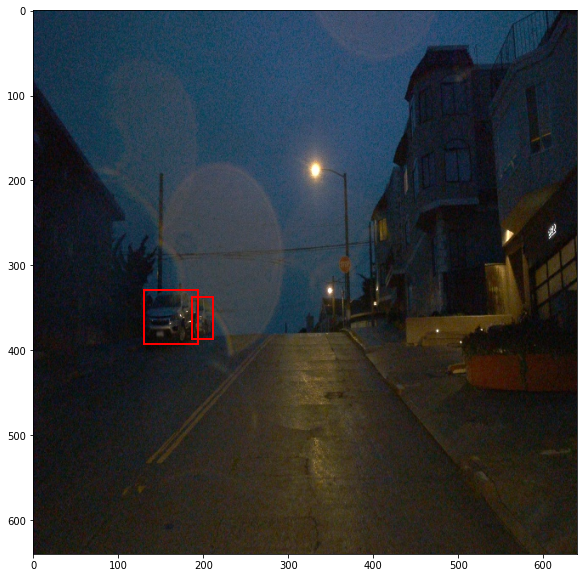

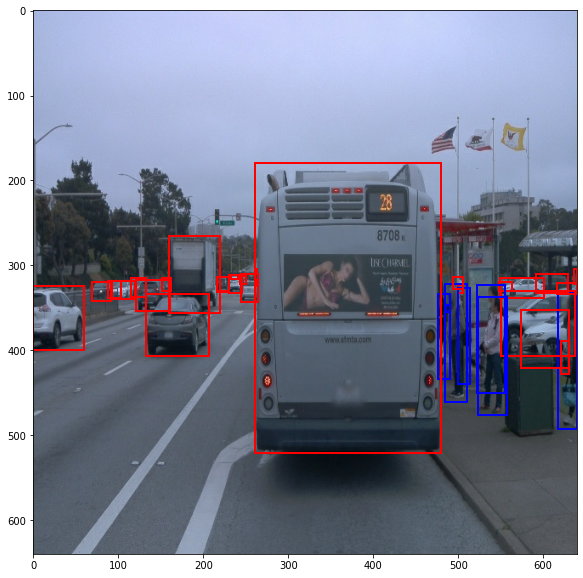

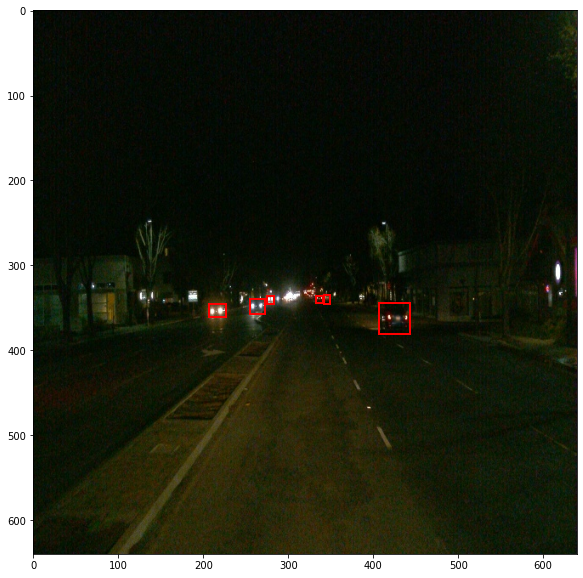

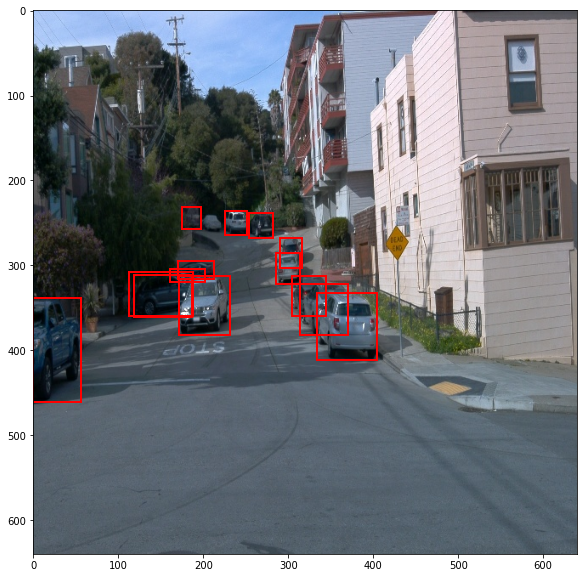

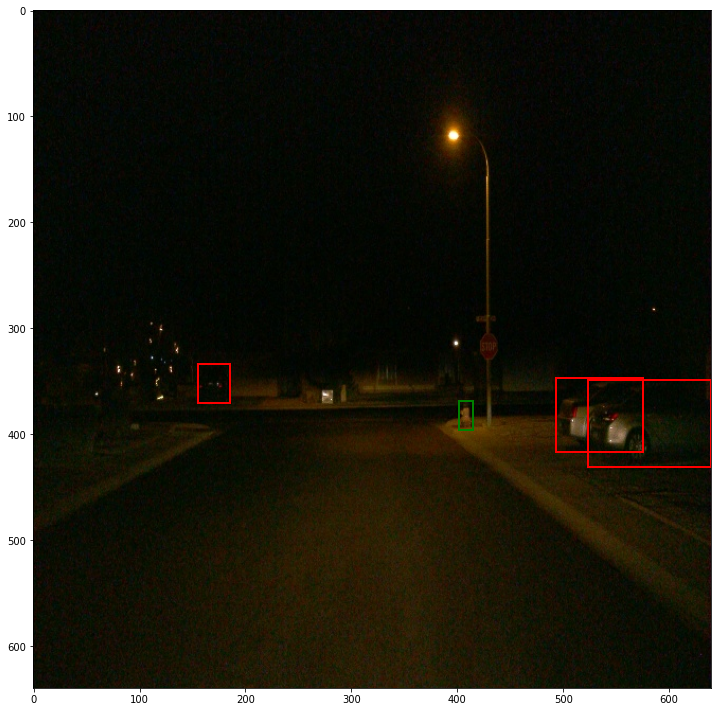

In [47]:
display_instances(dataset.take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [36]:
# Distribution of vehicle, pedestrian, cyclist classes
total_count = {1: 0, 2: 0, 4: 0}
labels = {1: [], 2: [], 4: []}

# Counting how many vehicles, pedestrians, cyclists there are for 20,000 images.
for sample in dataset.take(20000):
    count = {1: 0, 2: 0, 4: 0}
    for i in sample['groundtruth_classes'].numpy():
        total_count[i] += 1
        count[i] += 1
    labels[i].append(count[i])

In [20]:
total_count

{1: 358008, 2: 105649, 4: 2716}

Text(0, 0.5, 'Number of objects')

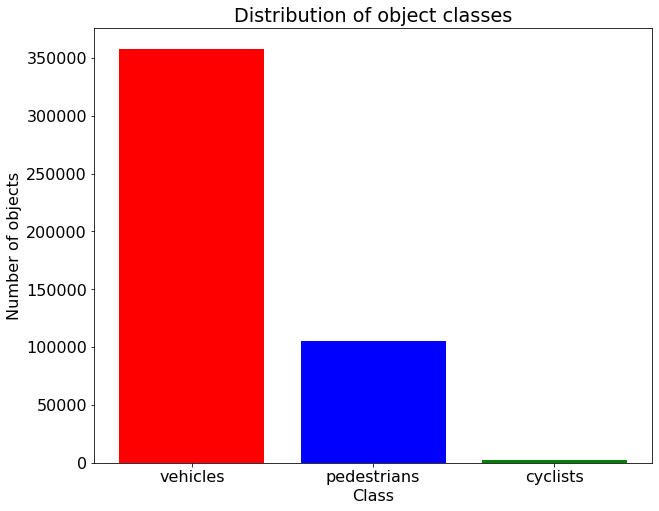

In [21]:
# Plot the distribution of the three object classes
fig = plt.figure(figsize=(10,8))
keys = total_count.keys()
val = [total_count[i] for i in keys]
plt.bar(['vehicles', 'pedestrians', 'cyclists'], val, color=['r', 'b', 'g'])
plt.title('Distribution of object classes')
plt.xlabel('Class')
plt.ylabel('Number of objects')

In [34]:
total_objects = sum(total_count.values())
print(f'{total_count[1]} vehicles ({total_count[1]/total_objects*100:.2f}%)\n\
{total_count[2]} pedestrians ({total_count[2]/total_objects*100:.2f}%)\n\
{total_count[4]} cyclists ({total_count[4]/total_objects*100:.2f}%)')

358008 vehicles (76.76%)
105649 pedestrians (22.65%)
2716 cyclists (0.58%)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

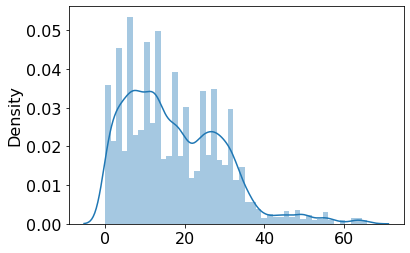

In [22]:
sns.distplot(labels[1], kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

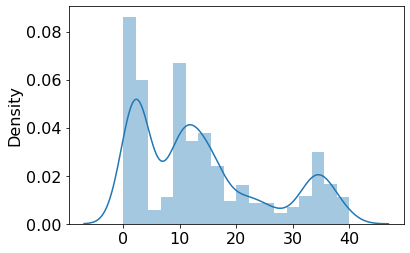

In [23]:
sns.distplot(labels[2], kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

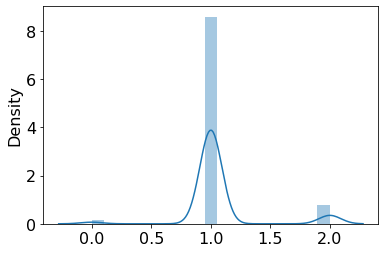

In [24]:
sns.distplot(labels[4], kde=True)